# Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score 
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16

ModuleNotFoundError: No module named 'pandas'

# Function for appending results

In [160]:
# Create an empty DataFrame with appropriate columns
columns = ['Model', 'MSE', 'R2']
results = pd.DataFrame(columns=columns)
results_cross_validation = pd.DataFrame(columns=columns)
results_test = pd.DataFrame(columns=columns)

# Function to append new results as separate rows
def append_result(list, model, mse, r2):
    new_row = {
        'Model': model,
        'MSE': mse,
        'R2': r2,
    }
    
    global results
    global results_cross_validation
    global results_test
    if list == 'results':
        results = results.append(new_row, ignore_index=True)
    elif list == 'results_cross_validation':
        results_cross_validation = results_cross_validation.append(new_row, ignore_index=True)
    else:
        results_test = results_test.append(new_row, ignore_index=True)



# Load data, plot and save fig.

Data size:  (500, 1)
Output size:  (500, 1)
X max: 0.9979209289222291


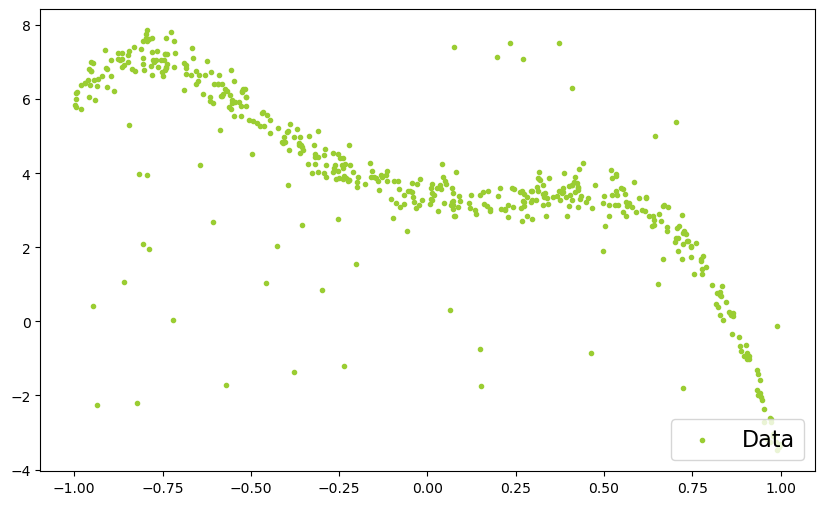

In [161]:
# Assuming the data is saved as a tuple (X, y)
X, y = np.load("../data/e01_data.npy")

# Make sure the data is there
print('Data size: ', X.shape)
print('Output size: ', y.shape)
print ('X max:', X.max())

plt.scatter(X, y, color='yellowgreen', marker='.',label='Data')
plt.legend(loc='lower right')


# Save image
plt.savefig('../deliverable/images/scatter_plot.png')

# Split

In [162]:
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.1, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.1, random_state=7)

print('Max de X_train:', X_train.max())
print('# training samples: ', X_train.shape[0])
print('# validation samples: ', X_val.shape[0])
print('# test samples: ', X_test.shape[0])

Max de X_train: 0.9979209289222291
# training samples:  405
# validation samples:  45
# test samples:  50


# GridSearch for K of KNN

In [163]:
# Set up a parameter grid to search for the best k
param_grid = {'n_neighbors': list(range(1, 21))}

# Perform grid search with cross-validation
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best number of neighbors
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal number of neighbors (k): {best_k}")

Optimal number of neighbors (k): 17


# KNN

In [164]:
# Fit a knn model
knn = neighbors.KNeighborsRegressor(best_k)
knn.fit(X_train, y_train)

# y_train_predicted = knn.predict(X_train)
y_val_predicted = knn.predict(X_val)
# rmse_train = mean_squared_error(y_train, y_train_predicted)
mse_val = mean_squared_error(y_val, y_val_predicted)
r2_val = r2_score(y_val, y_val_predicted)
#results append
append_result("results", f"KNN (k={best_k})", mse_val, r2_val)


# Print the results
print(f'KNN with {best_k} neighbors')
print('MSE (validation set): {}'.format(mse_val))
print('R2 (validation set): {}'.format(r2_val))

# plt.figure()
# plt.scatter(X_train, y_train, color='yellowgreen', marker='.', label='Training data')
# plt.scatter(X_val, y_val, color='blue', marker='.', label='Validation data')
# plt.scatter(X_val, y_val_predicted, color='cyan', marker='.', label='Validation predictions')
# plt.title(f'KNN with {n_neighbors} neighbors')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend(loc='lower right')
# plt.show()

KNN with 17 neighbors
MSE (validation set): 0.5139738472707338
R2 (validation set): 0.9163644165148587


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


# Linear

In [165]:
# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = lr.predict(X_val)
print('Linear model')
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set): {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set): {}'.format(r2_val))


append_result("results",f"Linear", mse_val, r2_val)

# Fit a Huber regression model
hu = linear_model.HuberRegressor()
hu.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = hu.predict(X_val)
print('Huber model')
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set): {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set): {}'.format(r2_val))

append_result("results",f"Huber", mse_val, r2_val)



# Fit a RANSAC regression model
ra = linear_model.RANSACRegressor()
ra.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = ra.predict(X_val)
print('RANSAC model')
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set): {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set): {}'.format(r2_val))
ev_val = explained_variance_score(y_val, y_val_predicted)
print('Explained variance (validation set): {}'.format(ev_val))

append_result("results",f"RANSAC", mse_val, r2_val)

# Use the model to generate data to plot
line_X_to_plot = np.linspace(X_train.min(), X_train.max(), 100)[:, np.newaxis]
line_y = lr.predict(line_X_to_plot)
line_y_huber = hu.predict(line_X_to_plot)
line_y_ransac = ra.predict(line_X_to_plot)

# lw = 2
# plt.scatter(X_train, y_train, color='yellowgreen', marker='.',label='Training data')
# plt.scatter(X_val, y_val, color='blue', marker='.', label='Validation data')
# plt.plot(line_X_to_plot, line_y, color='red', linewidth=lw, label='Linear regressor')
# plt.plot(line_X_to_plot, line_y_huber, color='orange', linewidth=lw, label='Huber regressor')
# plt.plot(line_X_to_plot, line_y_ransac, color='blue', linewidth=lw, label='RANSAC regressor')
# plt.legend(loc='lower right')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

Linear model
MSE (validation set): 0.9780663914619002
R2 (validation set): 0.8408456893838137
Huber model
MSE (validation set): 1.058902081519647
R2 (validation set): 0.8276918292403372
RANSAC model
MSE (validation set): 1.3370535849320615
R2 (validation set): 0.7824300646414224
Explained variance (validation set): 0.8014176279500274


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/Users/ignaciopastorebenaim/anaconda3/envs/CVISEnv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:19: FutureWarning: The frame.append method is deprecated and will be removed 

# Gridsearch for Lambda

In [166]:
# Define a function to create pipelines for Ridge and Lasso regression with polynomial features
def create_pipeline(model_type, lamba_range):
    pipeline = Pipeline([
        ('poly', PolynomialFeatures()),  # Polynomial feature generator
        (model_type, None)  # Placeholder for Ridge or Lasso model
    ])
    
    if model_type == 'ridge':
        param_grid = {
            'poly__degree': range(1, 13),  # Polynomial degrees from 1 to 12
            'ridge__alpha': lamba_range   # Regularization strength for Ridge
        }
        model = GridSearchCV(Pipeline([
            ('poly', PolynomialFeatures()),
            ('ridge', Ridge())
        ]), param_grid, cv=5)
    
    elif model_type == 'lasso':
        param_grid = {
            'poly__degree': range(1, 13),  # Polynomial degrees from 1 to 12
            'lasso__alpha': lamba_range   # Regularization strength for Lasso
        }
        model = GridSearchCV(Pipeline([
            ('poly', PolynomialFeatures()),
            ('lasso', Lasso())
        ]), param_grid, cv=5)

    return model

# Set the range of regularization parameters to test (lambda values)
lamba_range = [0.01, 0.1, 1, 10, 100]

# Ridge Regression with hyperparameter tuning
ridge_model = create_pipeline('ridge', lamba_range)
ridge_model.fit(X_train, y_train)
print(f"Best Ridge Model: Degree {ridge_model.best_params_['poly__degree']}, Lambda {ridge_model.best_params_['ridge__alpha']}")

# Lasso Regression with hyperparameter tuning
lasso_model = create_pipeline('lasso', lamba_range)
lasso_model.fit(X_train, y_train)
print(f"Best Lasso Model: Degree {lasso_model.best_params_['poly__degree']}, Lambda {lasso_model.best_params_['lasso__alpha']}")

Best Ridge Model: Degree 12, Lambda 0.01
Best Lasso Model: Degree 6, Lambda 0.01


# Polynomial

In [167]:
degrees = [6,7]

for degree in degrees: 
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    print ('Polinomial degree:', degree)
    lr = linear_model.LinearRegression()
    lr.fit(X_poly, y_train)
    # Predict output for the validation data
    y_val_predicted = lr.predict(X_poly_val)
    print('Polynomial model with degree: ', degree)
    # Compute metrics in the validation data
    mse_val = mean_squared_error(y_val, y_val_predicted)
    print('MSE (validation set): {}'.format(mse_val))
    r2_val = r2_score(y_val, y_val_predicted)
    print('R2 (validation set): {}'.format(r2_val))

    append_result("results",f"Polynomial (degree={degree})", mse_val, r2_val)

    #Ridge
    lamba_ridge_lasso = 0.01

    rr = linear_model.Ridge(alpha=lamba_ridge_lasso)
    rr.fit(X_poly, y_train)
    # Predict output for the validation data
    y_val_predicted = rr.predict(X_poly_val)
    print('Ridge model model with degree: ', degree)
    # Compute metrics in the validation data
    mse_val = mean_squared_error(y_val, y_val_predicted)
    print('MSE (validation set): {}'.format(mse_val))
    r2_val = r2_score(y_val, y_val_predicted)
    print('R2 (validation set): {}'.format(r2_val))

    append_result("results", f"Ridge (degree={degree}, $\lambda={lamba_ridge_lasso}$)", mse_val, r2_val)

    #Lasso
    lasso = linear_model.Lasso(alpha=lamba_ridge_lasso)
    lasso.fit(X_poly, y_train)
    y_val_predicted = lasso.predict(X_poly_val)
    print('Lasso model model with degree: ', degree)
    # Compute metrics in the validation data
    mse_val = mean_squared_error(y_val, y_val_predicted)
    print('MSE (validation set): {}'.format(mse_val))
    r2_val = r2_score(y_val, y_val_predicted)
    print('R2 (validation set): {}'.format(r2_val))
    

    append_result("results", f"Lasso (degree={degree}, $\lambda={lamba_ridge_lasso}$)", mse_val, r2_val)
    
    # Use the model to generate data to plot
    linspace_X = np.linspace(X.min(), X.max(), num=100)[:, np.newaxis]
    linspace_X_poly = poly.fit_transform(linspace_X)
    linspace_y_lr = lr.predict(linspace_X_poly)
    linspace_y_rr = rr.predict(linspace_X_poly)
    linspace_y_lasso = lasso.predict(linspace_X_poly)

    # #plot the data and the model
    # plt.scatter(X_train, y_train, color='yellowgreen', marker='.',label='Training data')
    # plt.scatter(X_val, y_val, color='blue', marker='.', label='Validation data')
    # plt.plot(linspace_X, linspace_y_lr, color='red', linewidth=2, label='Polynomial model')
    # plt.plot(linspace_X, linspace_y_rr, color='orange', linewidth=2, label='Ridge model')
    # plt.plot(linspace_X, linspace_y_lasso, color='blue', linewidth=2, label='Lasso model')
    # plt.legend(loc='lower right')
    # plt.xlabel("x")
    # plt.ylabel("y")
    # plt.title(f'Polynomial model with degree: {degree}')
    # plt.show()

Polinomial degree: 6
Polynomial model with degree:  6
MSE (validation set): 0.42459760114612516
R2 (validation set): 0.9309080251712847
Ridge model model with degree:  6
MSE (validation set): 0.4301607668160987
R2 (validation set): 0.9300027678137296
Lasso model model with degree:  6
MSE (validation set): 0.47363579977975845
R2 (validation set): 0.9229283616581258
Polinomial degree: 7
Polynomial model with degree:  7
MSE (validation set): 0.5086628021772996
R2 (validation set): 0.9172286479493256
Ridge model model with degree:  7
MSE (validation set): 0.4648744914330767
R2 (validation set): 0.9243540317375647
Lasso model model with degree:  7
MSE (validation set): 0.4736283196971152
R2 (validation set): 0.9229295788427738


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

# Write validation results

In [168]:
# Convert to LaTeX with custom formatting
latex_table = results[['Model', 'MSE', 'R2']].to_latex(index=False, 
    column_format='|l|l|c|c|',  # Custom column alignment and borders
    float_format="%.3f",         # Ensure floating point numbers use 3 decimals
    bold_rows=True,              # Bold the header row
    longtable=False,             # Use standard table format
    caption="Initial validation performance",  # Add caption
    label="tab:validation", # Add label for referencing
    escape=False                # Prevent LaTeX special characters from being escaped
)


# Save the table to a file
with open('../deliverable/tables/results.tex', 'w') as f:
    f.write(latex_table)


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3790201656.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = results[['Model', 'MSE', 'R2']].to_latex(index=False,


# Cross Validate Poly and Ridge

In [169]:
columns = ['Model', 'MSE', 'R2']
results_cross_validation = pd.DataFrame(columns=columns)

# Function to perform cross-validation for standard polynomial regression (no regularization)
def cross_validate_polynomial(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    
    lin_reg = LinearRegression()  # Plain polynomial regression
    
    # Perform cross-validation and compute both MSE and R²
    scoring = {'mse': 'neg_mean_squared_error', 'r2': 'r2'}
    scores = cross_validate(lin_reg, X_train_poly, y_train, scoring=scoring, cv=10, return_train_score=True)
    
    # Calculate the mean MSE and R² over the 5-fold cross-validation
    mean_mse = -scores['test_mse'].mean()  # Convert negative MSE to positive
    mean_r2 = scores['test_r2'].mean()  # R² score is already positive
    
    print(f"Polynomial Degree: {degree}, Cross-Validation MSE: {mean_mse}, R²: {mean_r2}")
    
    return mean_mse, mean_r2

# Function to perform cross-validation for Ridge regression with polynomial features
def cross_validate_ridge(degree, alpha):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    
    ridge_reg = Ridge(alpha=alpha)  # Ridge regression with given alpha (lambda)
    
    # Perform cross-validation and compute both MSE and R²
    scoring = {'mse': 'neg_mean_squared_error', 'r2': 'r2'}
    scores = cross_validate(ridge_reg, X_train_poly, y_train, scoring=scoring, cv=10, return_train_score=True)
    
    # Calculate the mean MSE and R² over the 5-fold cross-validation
    mean_mse = -scores['test_mse'].mean()  # Convert negative MSE to positive
    mean_r2 = scores['test_r2'].mean()  # R² score is already positive
    
    print(f"Ridge Degree: {degree}, Alpha: {alpha}, Cross-Validation MSE: {mean_mse}, R²: {mean_r2}")
    
    return mean_mse, mean_r2

# Function to perform cross-validation for Lasso regression with polynomial features
def cross_validate_lasso(degree, alpha):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    lasso_reg = Lasso(alpha=alpha)  # Lasso regression with given alpha (lambda)

    # Perform cross-validation and compute both MSE and R²
    scoring = {'mse': 'neg_mean_squared_error', 'r2': 'r2'}
    scores = cross_validate(lasso_reg, X_train_poly, y_train, scoring=scoring, cv=10, return_train_score=True)

    # Calculate the mean MSE and R² over the 5-fold cross-validation
    mean_mse = -scores['test_mse'].mean()  # Convert negative MSE to positive
    mean_r2 = scores['test_r2'].mean()  # R² score is already positive

    print(f"Lasso Degree: {degree}, Alpha: {alpha}, Cross-Validation MSE: {mean_mse}, R²: {mean_r2}")

    return mean_mse, mean_r2


# Define the degrees and alpha for Ridge (based on GridSearch results)
degrees = [6, 7]
optimal_alpha = 0.01

# Loop through degrees to compare Polynomial and Ridge with both MSE and R²
for degree in degrees:
    print(f"\n--- Testing Degree: {degree} ---")
    
    # Cross-validate plain polynomial regression (no regularization)
    mse_polynomial, r2_polynomial = cross_validate_polynomial(degree)

    append_result("results_cross_validation", f"Polynomial (degree={degree})", mse_polynomial, r2_polynomial)
    
    # Cross-validate Ridge regression with optimal alpha
    mse_ridge, r2_ridge = cross_validate_ridge(degree, optimal_alpha)

    append_result("results_cross_validation", f"Ridge (degree={degree}, $\lambda={optimal_alpha}$)", mse_ridge, r2_ridge)

    # Cross-validate Lasso regression with optimal alpha
    mse_lasso, r2_lasso = cross_validate_lasso(degree, optimal_alpha)

    append_result("results_cross_validation", f"Lasso (degree={degree}, $\lambda={optimal_alpha}$)", mse_lasso, r2_lasso)
    
    # Compare and print results
    print(f"Degree: {degree}, Polynomial MSE: {mse_polynomial}, Polynomial R²: {r2_polynomial}")
    print(f"Degree: {degree}, Ridge MSE (alpha={optimal_alpha}): {mse_ridge}, Ridge R²: {r2_ridge}")
    print(f"Degree: {degree}, Lasso MSE (alpha={optimal_alpha}): {mse_lasso}, Lasso R²: {r2_lasso}")





--- Testing Degree: 6 ---
Polynomial Degree: 6, Cross-Validation MSE: 1.7697015589978844, R²: 0.6822358705479431
Ridge Degree: 6, Alpha: 0.01, Cross-Validation MSE: 1.769330279311765, R²: 0.6824611602204677
Lasso Degree: 6, Alpha: 0.01, Cross-Validation MSE: 1.8129167813863964, R²: 0.6762863362866584
Degree: 6, Polynomial MSE: 1.7697015589978844, Polynomial R²: 0.6822358705479431
Degree: 6, Ridge MSE (alpha=0.01): 1.769330279311765, Ridge R²: 0.6824611602204677
Degree: 6, Lasso MSE (alpha=0.01): 1.8129167813863964, Lasso R²: 0.6762863362866584

--- Testing Degree: 7 ---
Polynomial Degree: 7, Cross-Validation MSE: 1.7634693887232935, R²: 0.6836940025478777
Ridge Degree: 7, Alpha: 0.01, Cross-Validation MSE: 1.7647285423987111, R²: 0.6834184752962765
Lasso Degree: 7, Alpha: 0.01, Cross-Validation MSE: 1.8129108433294756, R²: 0.6762873565763002
Degree: 7, Polynomial MSE: 1.7634693887232935, Polynomial R²: 0.6836940025478777
Degree: 7, Ridge MSE (alpha=0.01): 1.7647285423987111, Ridge R²:

/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_cross_validation = results_cross_validation.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_cross_validation = results_cross_validation.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_cross_validation = results_cross_validation.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:21: Fu

# Cross Validate KNN

In [170]:
# Function to perform cross-validation for k-NN regression
def cross_validate_knn(k):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    
    # Perform cross-validation and compute both MSE and R²
    scoring = {'mse': 'neg_mean_squared_error', 'r2': 'r2'}
    scores = cross_validate(knn_reg, X_train, y_train, scoring=scoring, cv=5)
    
    # Calculate the mean MSE and R² over the 5-fold cross-validation
    mean_mse = -scores['test_mse'].mean()  # Convert negative MSE to positive
    mean_r2 = scores['test_r2'].mean()  # R² score is already positive
    
    print(f"k-NN (k={k}), Cross-Validation MSE: {mean_mse}, R²: {mean_r2}")
    
    return mean_mse, mean_r2

# Test k-NN for different values of k (number of neighbors)
k_values = [17]

# Loop through k values to compare k-NN performance
for k in k_values:
    mse_kkn, r2_knn = cross_validate_knn(k)
    append_result("results_cross_validation", f"KNN (k={k})", mse_kkn, r2_knn)



k-NN (k=17), Cross-Validation MSE: 1.8027226721677292, R²: 0.704955085972064


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_cross_validation = results_cross_validation.append(new_row, ignore_index=True)


# Save to table Cross-Validation

In [171]:
# Convert to LaTeX with custom formatting
latex_table_cross_validation = results_cross_validation[['Model', 'MSE', 'R2']].to_latex(index=False, 
    column_format='|l|l|c|c|',  # Custom column alignment and borders
    float_format="%.3f",         # Ensure floating point numbers use 3 decimals
    bold_rows=True,              # Bold the header row
    longtable=False,             # Use standard table format
    caption="Cross-validation performance",  # Add caption
    label="tab:cross_validation", # Add label for referencing
    escape=False                # Prevent LaTeX special characters from being escaped
)


# Save the table to a file
with open('../deliverable/tables/cross_validation.tex', 'w') as f:
    f.write(latex_table_cross_validation)

/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3433936917.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table_cross_validation = results_cross_validation[['Model', 'MSE', 'R2']].to_latex(index=False,


# Tests: KNN, Poly (6 and 7) 

In [172]:
# Combine training and validation sets
X_train_full = np.vstack((X_train, X_val))  # Stack the feature sets
y_train_full = np.concatenate((y_train, y_val))  # Use concatenate for 1D target arrays

# Train the final k-NN model on the combined training + validation set
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_train_full, y_train_full)

# Predict on the test set
y_test_pred = knn_final.predict(X_test)

# Calculate performance metrics on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

append_result("results_test", f"KNN (k={best_k})", mse_test, r2_test)

print(f"Test MSE (final model): {mse_test}")
print(f"Test R² (final model): {r2_test}")

# Loop through degrees to compare Polynomial and Ridge with both MSE and R²
for degree in degrees:
    print(f"\n--- Testing Degree: {degree} ---")

    poly_final = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_full)  # Transform the combined training set
    X_test_poly = poly.transform(X_test)  # Transform the test set

    # LINEART
    # Train the polynomial regression model
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train_full)

    # Predict on the test set for Polynomial Regression
    y_test_pred_poly = poly_reg.predict(X_test_poly)

    # Calculate performance metrics on the test set for Polynomial Regression
    mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
    r2_test_poly = r2_score(y_test, y_test_pred_poly)

    append_result("results_test", f"Polynomial (degree={degree})", mse_test_poly, r2_test_poly)

    print(f"Test MSE (Polynomial Degree {degree}): {mse_test_poly}")
    print(f"Test R² (Polynomial Degree {degree}): {r2_test_poly}")

    # RIDGE
    # Train Ridge regression model with polynomial features (degree 6)
    ridge_reg = Ridge(alpha=optimal_alpha)
    ridge_reg.fit(X_train_poly, y_train_full)

    # Predict on the test set for Ridge Regression
    y_test_pred_ridge = ridge_reg.predict(X_test_poly)

    # Calculate performance metrics on the test set for Ridge Regression
    mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
    r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
    
    append_result("results_test", f"Ridge (degree={degree}, $\lambda={optimal_alpha}$)", mse_test_ridge, r2_test_ridge)

    print(f"Test MSE (Ridge Degree {degree}, Lambda {optimal_alpha}): {mse_test_ridge}")
    print(f"Test R² (Ridge Degree {degree}, Lambda {optimal_alpha}): {r2_test_ridge}")

    # LASSO
    # Train Lasso regression model with polynomial features (degree 6)
    lasso_reg = Lasso(alpha=optimal_alpha)
    lasso_reg.fit(X_train_poly, y_train_full)

    # Predict on the test set for Lasso Regression
    y_test_pred_lasso = lasso_reg.predict(X_test_poly)

    # Calculate performance metrics on the test set for Lasso Regression
    mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
    r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

    append_result("results_test", f"Lasso (degree={degree}, $\lambda={optimal_alpha}$)", mse_test_lasso, r2_test_lasso)

    print(f"Test MSE (Lasso Degree {degree}, Lambda {optimal_alpha}): {mse_test_lasso}")
    print(f"Test R² (Lasso Degree {degree}, Lambda {optimal_alpha}): {r2_test_lasso}")


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test = results_test.append(new_row, ignore_index=True)


Test MSE (final model): 1.1265746754041672
Test R² (final model): 0.8066404900533751

--- Testing Degree: 6 ---
Test MSE (Polynomial Degree 6): 1.1601759090717094
Test R² (Polynomial Degree 6): 0.8008733463234425
Test MSE (Ridge Degree 6, Lambda 0.01): 1.1551541658789637
Test R² (Ridge Degree 6, Lambda 0.01): 0.8017352526169412
Test MSE (Lasso Degree 6, Lambda 0.01): 1.1532222455610819
Test R² (Lasso Degree 6, Lambda 0.01): 0.8020668375301097

--- Testing Degree: 7 ---
Test MSE (Polynomial Degree 7): 1.1601759090717094
Test R² (Polynomial Degree 7): 0.8008733463234425
Test MSE (Ridge Degree 7, Lambda 0.01): 1.1551541658789637
Test R² (Ridge Degree 7, Lambda 0.01): 0.8017352526169412
Test MSE (Lasso Degree 7, Lambda 0.01): 1.1532222455610819
Test R² (Lasso Degree 7, Lambda 0.01): 0.8020668375301097


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test = results_test.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test = results_test.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test = results_test.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/3843572422.py:23: FutureWarning: The frame.append method is deprecated and will be removed f

# Save to table Tests

In [173]:
# Convert to LaTeX with custom formatting
latex_table_test = results_test[['Model', 'MSE', 'R2']].to_latex(index=False, 
    column_format='|l|l|c|c|',  # Custom column alignment and borders
    float_format="%.3f",         # Ensure floating point numbers use 3 decimals
    bold_rows=True,              # Bold the header row
    longtable=False,             # Use standard table format
    caption="Tests performance",  # Add caption
    label="tab:tests", # Add label for referencing
    escape=False                # Prevent LaTeX special characters from being escaped
)


# Save the table to a file
with open('../deliverable/tables/tests.tex', 'w') as f:
    f.write(latex_table_test)

/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_89365/1117443164.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table_test = results_test[['Model', 'MSE', 'R2']].to_latex(index=False,
